# Logical Alarms for Misaligned Classifiers

The power of logic alone as an aid for AI safety is demonstrated by the algorithms in the `ntqr.alams` module. This notebook provides some examples demonstrating their use.

In [3]:
import ntqr.alarms, ntqr.plots
import ntqr.r2.raxioms, ntqr.r2.evaluations
import ntqr.r3.raxioms, ntqr.r3.evaluations
import matplotlib.pyplot as plt
import sympy, random
sympy.init_session()

IPython console for SymPy 1.13.2 (Python 3.11.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.13.2/



## Binary classification, the R=2 case

In [5]:
# The basic unit of the alarms are comparisons between pairs of classifiers in an ensemble
# For each classifier we create its individual axioms
labels = ['a', 'b']
c1axioms = ntqr.r2.raxioms.SingleClassifierAxioms(labels, 'i')
c2axioms = ntqr.r2.raxioms.SingleClassifierAxioms(labels, 'j')
# Let's make an alarm for a small test, Q=10 questions.
alarm = ntqr.alarms.SingleClassifierAxiomAlarm(10,(c1axioms, c2axioms), ntqr.r2.evaluations.SingleClassifierEvaluations)
# We want the classifiers to be better than 1/2 for both labels
alarm.set_safety_specification([2,2])

In [6]:
# Let's first look at a test where these two pairs are misaligned. The misalignment trace
# gives us the number of question types and whether one or more of the classifiers fail
# the safety specification (> 50%) at the assumed number of question types.
alarm.misalignment_trace([(2,8),(8,2)])

{((0, 10), True),
 ((1, 9), True),
 ((2, 8), True),
 ((3, 7), True),
 ((4, 6), True),
 ((5, 5), True),
 ((6, 4), True),
 ((7, 3), True),
 ((8, 2), True),
 ((9, 1), True),
 ((10, 0), True)}

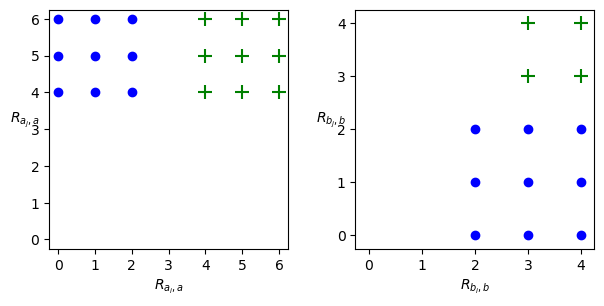

In [7]:
# We can check visually for the misalignment
ntqr.plots.plot_pair_logical_alarm_at_qs(labels, ['i','j'], (6,4), [(2,8),(8,2)], plt=plt)

At the assumed number of questions (Q_a = 6, Q_b = 4), there are not evaluations for either of these classifiers that have both of them hitting the green cross points - the points that satisfy the safety specification.

In [9]:
# Let's now try pair responses that cannot conclusively prove the pair is misaligned.
alarm.misalignment_trace([(2,8),(3,7)])

{((0, 10), False),
 ((1, 9), False),
 ((2, 8), False),
 ((3, 7), False),
 ((4, 6), True),
 ((5, 5), True),
 ((6, 4), True),
 ((7, 3), True),
 ((8, 2), True),
 ((9, 1), True),
 ((10, 0), True)}

These classifier responses have question settings (e.g. (2,8)) where the pair has evaluations that are logically consistent with how they responded **and** satisfy the safety specification. And there are also question number settings that do not satisfy the safety specification.

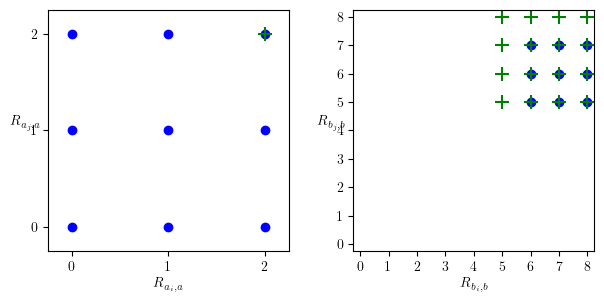

In [11]:
# The question numbers that has group evaluations that satisfy the safety specification
ntqr.plots.plot_pair_logical_alarm_at_qs(labels, ['i','j'], (2,8),[(2,8),(3,7)], plt=plt)

At Q_a = 2 and Q_b = 8 there are group evaluations for both labels that satisfy the safety specification.

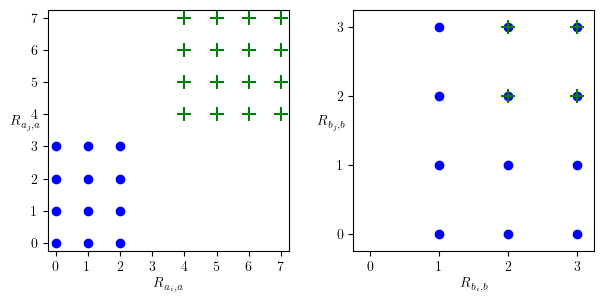

In [13]:
# The question numbers that has group evaluations that DO NOT satisfy the safety specification
ntqr.plots.plot_pair_logical_alarm_at_qs(labels, ['i','j'], (7,3),[(2,8),(3,7)], plt=plt)

Here we can see that the 'a' label has to group evaluation with question numbers (Q_a = 7, Q_b = 3) where both classifiers are better than 50% for **both** labels.

## Three class classification, the R=3 case

In [16]:
# The basic unit of the alarms are comparisons between pairs of classifiers in an ensemble
# For each classifier we create its individual axioms
# We now have three labels for two classifiers
labels = ['a', 'b', 'c']
c1axioms = ntqr.r3.raxioms.SingleClassifierAxioms(labels, 'i')
c2axioms = ntqr.r3.raxioms.SingleClassifierAxioms(labels, 'j')
# Let's make an alarm for a small test, Q=10 questions.
alarm = ntqr.alarms.SingleClassifierAxiomAlarm(10,(c1axioms, c2axioms), ntqr.r3.evaluations.SingleClassifierEvaluations)
# We want the classifiers to be better than 1/2 for both labels
alarm.set_safety_specification([2,2,2])

In [17]:
# We look at responses that make the pair misaligned
# This computation will take a while
alarm.misalignment_trace([(5,3,2),(2,3,5)])

{((0, 0, 10), True),
 ((0, 1, 9), True),
 ((0, 2, 8), True),
 ((0, 3, 7), True),
 ((0, 4, 6), True),
 ((0, 5, 5), True),
 ((0, 6, 4), True),
 ((0, 7, 3), True),
 ((0, 8, 2), True),
 ((0, 9, 1), True),
 ((0, 10, 0), True),
 ((1, 0, 9), True),
 ((1, 1, 8), True),
 ((1, 2, 7), True),
 ((1, 3, 6), True),
 ((1, 4, 5), True),
 ((1, 5, 4), True),
 ((1, 6, 3), True),
 ((1, 7, 2), True),
 ((1, 8, 1), True),
 ((1, 9, 0), True),
 ((2, 0, 8), True),
 ((2, 1, 7), True),
 ((2, 2, 6), True),
 ((2, 3, 5), True),
 ((2, 4, 4), True),
 ((2, 5, 3), False),
 ((2, 6, 2), True),
 ((2, 7, 1), True),
 ((2, 8, 0), True),
 ((3, 0, 7), True),
 ((3, 1, 6), True),
 ((3, 2, 5), True),
 ((3, 3, 4), True),
 ((3, 4, 3), False),
 ((3, 5, 2), False),
 ((3, 6, 1), True),
 ((3, 7, 0), True),
 ((4, 0, 6), True),
 ((4, 1, 5), True),
 ((4, 2, 4), True),
 ((4, 3, 3), True),
 ((4, 4, 2), True),
 ((4, 5, 1), True),
 ((4, 6, 0), True),
 ((5, 0, 5), True),
 ((5, 1, 4), True),
 ((5, 2, 3), True),
 ((5, 3, 2), True),
 ((5, 4, 1), Tr

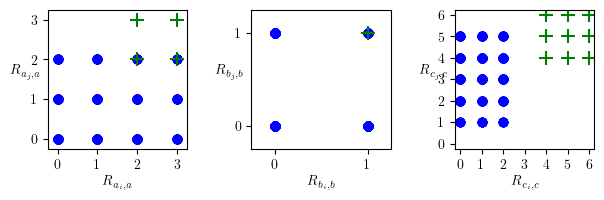

In [18]:
# The question numbers that has group evaluations that does not satisfy the safety specification
ntqr.plots.plot_pair_logical_alarm_at_qs(labels, ['i','j'], (3,1,6),[(5,3,2),(2,3,5)], plt=plt)

In [19]:
# Now a pair that is not logically misaligned (i.e. there exist questions numbers that satisfy the safety specification)
# We look at responses that make the pair misaligned
# This computation will take a while
alarm.misalignment_trace([(5,3,2),(4,3,3)])

{((0, 0, 10), True),
 ((0, 1, 9), True),
 ((0, 2, 8), True),
 ((0, 3, 7), True),
 ((0, 4, 6), True),
 ((0, 5, 5), True),
 ((0, 6, 4), True),
 ((0, 7, 3), True),
 ((0, 8, 2), True),
 ((0, 9, 1), True),
 ((0, 10, 0), True),
 ((1, 0, 9), True),
 ((1, 1, 8), True),
 ((1, 2, 7), True),
 ((1, 3, 6), True),
 ((1, 4, 5), True),
 ((1, 5, 4), True),
 ((1, 6, 3), True),
 ((1, 7, 2), True),
 ((1, 8, 1), True),
 ((1, 9, 0), True),
 ((2, 0, 8), True),
 ((2, 1, 7), True),
 ((2, 2, 6), True),
 ((2, 3, 5), True),
 ((2, 4, 4), True),
 ((2, 5, 3), False),
 ((2, 6, 2), True),
 ((2, 7, 1), True),
 ((2, 8, 0), True),
 ((3, 0, 7), True),
 ((3, 1, 6), True),
 ((3, 2, 5), True),
 ((3, 3, 4), True),
 ((3, 4, 3), False),
 ((3, 5, 2), False),
 ((3, 6, 1), True),
 ((3, 7, 0), True),
 ((4, 0, 6), True),
 ((4, 1, 5), True),
 ((4, 2, 4), True),
 ((4, 3, 3), False),
 ((4, 4, 2), False),
 ((4, 5, 1), False),
 ((4, 6, 0), True),
 ((5, 0, 5), True),
 ((5, 1, 4), True),
 ((5, 2, 3), False),
 ((5, 3, 2), False),
 ((5, 4, 1

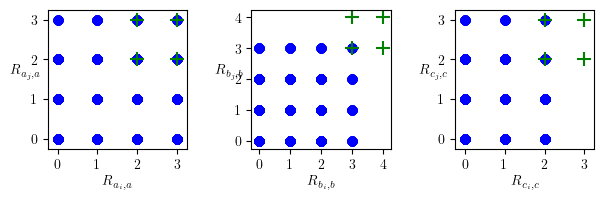

In [20]:
# The question numbers that has group evaluations that satisfy the safety specification
ntqr.plots.plot_pair_logical_alarm_at_qs(labels, ['i','j'], (3,4,3),[(5,3,2),(4,3,3)], plt=plt)

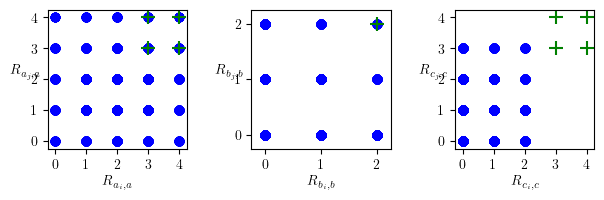

In [21]:
# The question numbers that has group evaluations that does not satisfy the safety specification
# Here the 1st classifiers 'i' is not greater than 50% for the c-label
ntqr.plots.plot_pair_logical_alarm_at_qs(labels, ['i','j'], (4,2,4),[(5,3,2),(4,3,3)], plt=plt)